# COGS 108 - Final Project

## Permissions

- [X] YES - make available
- [ ] NO - keep private

## Overview

 In this project, we specified different aspects of a woman’s experience in the workplace, female participation, management positions, and maternity leave, and investigated their connection to both each other and to a woman’s place in the industry and workforce as a whole.


## Names

- Gaurika Duvur
- Anjali Ramesh
- Apurwa Shukla
- Vicky Vo

## Group Members IDs

- A14461573
- A15524912
- A14024123
- A13950829

## Research Question

Does the amount of females who work in an industry predict the amount of maternity leave that is offered in that industry. Does having more women in management and executive roles predict that industry has an effect on the amount of maternity leave that is offered in that industry? Following this line of questioning, how has female participation in the workforce changed over time?

## Background and Prior Work

  This topic is of interest to our group because, as female students preparing to enter the workforce, particularly in male dominated STEM fields, we have noticed the increased attention on the disparity between male and female workers throughout industries, and factors that contribute to this gap. Since there are certain states that are better than others when it comes to wage disparity and earnings, there must also be certain industries that are more beneficial for women (3). We wanted to learn more about the components that affect a woman’s success in a specific field in order to be able to predict the industries that are the most profitable for women today. 

   There has been research done on different aspects of female employment, such as income, paid and unpaid leave, socioeconomic status, and education. With regards to COGS 108 in particular, there is a project focusing on the effect of maternity leave on female involvement in the workforce, which takes into consideration aspects of our research question (1). The results of this project conclude that there was a stronger effect of maternity leave on female participation in the workforce than participation on maternity leave. Another project describes policies surrounding acceptance rates of women in STEM careers and whether or not these policies are fair (2). This project shows that there is not much of an inequality between hiring rates of men and women in STEM fields, and that the proportion of men and women working in these fields is fairly equal. Both these projects use data that could be useful to answering our research question. 
    
    
References (include links):
1. https://github.com/COGS108/FinalProjects-Wi20/blob/master/FinalProject_group069.ipynb
2. https://github.com/COGS108/FinalProjects-Wi20/blob/master/FinalProject_group093.ipynb

## Hypothesis

We hypothesize that paid maternity leave will be a predictor for female participation in the workplace; we anticipate that female participation will be higher in companies that provide more paid maternity leave. We also hypothesize that there will be a positive correlation between maternity leave and the proportion of women in companies holding executive and managerial positions.

## Datasets


The ideal dataset would include the proportion of the labor force in that occupation that are women, their average income in that industry (as well as how that income differs between male and female workers), and the average number of weeks of paid maternity leave offered in that industry.


### Dataset 1

Name: US Incomes by Occupations and Gender

Link: https://www.kaggle.com/jonavery/incomes-by-career-and-gender


Configuration: These are the categories the data is divided into
- Occupation: Job title as given from BLS. Industry summaries are given in ALL CAPS.
- All_workers: Number of workers male and female, in thousands.
- All_weekly: Median weekly income including male and female workers, in USD.
- M_workers: Number of male workers, in thousands.
- M_weekly: Median weekly income for male workers, in USD.
- F_workers: Number of female workers, in thousands.
- F_weekly: Median weekly income for female workers, in USD.

Number of observations: 535

Description: The dataset on US incomes by occupation and gender provides data on median weekly income of male and female in 535 different occupations. This dataset has been retrieved from the bureau of labor statistics.


### Dataset 2

Name: 18: Employed persons by detailed industry, sex, race, and Hispanic or Latino ethnicity

Source: The US Bureau of Labor and Statistics (https://www.bls.gov/cps/cpsaat18.htm)

Rows: 335

Configuration: Industry, Total employed, % of women employed, % white  employed, % Black or African American  employed, % Hispanic of Latino Employed

Description: This data was from the population survey for 2018. 
 


### Dataset 3

Name: Proportion of women in managerial positions

Link: https://genderstats.un.org/#/downloads

Configuration: Indicator name, Country Code, Region, Year, Sex, Age, Location, Occupation, Value, Lower Bound, Upper Bound, Unit, Nature Data, Origin Data, Footnote 1, Footnote 2 (this data must be cleaned appropriately before use)

Number of observations: 1908

Description: The United Nations provides data on the percentage of women in senior and middle management positions in various countries around the world. (For the purposes of this analysis, we will be focusing on the United States.)


### Dataset 4

Name: Proportion of women in senior and middle management positions

Link: https://genderstats.un.org/#/downloads

Configuration: Indicator name, Country Code, Region, Year, Sex, Age, Location, Occupation, Value, Lower Bound, Upper Bound, Unit, Nature Data, Origin Data, Footnote 1, Footnote 2 (this data must be cleaned appropriately before use)

Number of observations: 427

Description: The United Nations provides data on the proportion of women in senior and middle management positiosn around the world. (For the purposes of this analysis, we will be focusing on the United States.)

### Dataset 5

Name: Reveal_EEO1_for_2016

Source: The US Bureau of Labor and Statistics (https://www.bls.gov/cps/cpsaat18.htm)

Rows: 4501

Configuration: company, year, race, gender, job category, count

Description: This database contains EEO-1 reports filed by Silicon Valley tech companies. It was compiled by Reveal from The Center for Investigative Reporti

## Setup

In [3]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy

import csv
import time
import statistics

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

### Dataset 1 

This dataset shows the number and income of female and male workers in different occupations. The income is median weekly income. While cleaning the data, we realized that there were several null values, so we started off with getting rid of the null values. In this specific data the null values were names "Na" rather than "Nan", so we had to use another apporach than the method we learned in the class.'' 


In [7]:
df = pd.read_csv('inc_occ_gender.csv')
df

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
...,...,...,...,...,...,...,...
553,Pumping station operators,18,Na,17,Na,1,Na
554,Refuse and recyclable material collectors,72,501,66,496,6,Na
555,Mine shuttle car operators,0,Na,0,Na,0,Na
556,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na


In [10]:
df = df[df["M_weekly"]!="Na"]
df = df.reset_index()


In [11]:
df = df[df.M_workers != 'Na']

In [12]:
df = df[df.F_workers != 'Na']

In [13]:
df = df[df.All_weekly != 'Na']

In [14]:
df = df[df.M_weekly != 'Na']

In [15]:
df = df[df.F_weekly != 'Na']

In [16]:
df.shape

(142, 9)

In [17]:
df['M_weekly'] = pd.to_numeric(df['M_weekly'])
df['F_weekly'] = pd.to_numeric(df['F_weekly'])

In [18]:
df=df.assign(weekly_gap=(df['M_weekly'] - df['F_weekly']))
df

,level_0,index,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,weekly_gap
0,0,0,ALL OCCUPATIONS,109080,809,60746,895,48334,726,169
1,1,1,MANAGEMENT,12480,1351,7332,1486,5147,1139,347
2,2,2,Chief executives,1046,2041,763,2251,283,1836,415
3,3,3,General and operations managers,823,1260,621,1347,202,1002,345
4,4,6,Marketing and sales managers,948,1462,570,1603,378,1258,345
...,...,...,...,...,...,...,...,...,...,...
218,218,521,TRANSPORTATION,6953,646,5998,679,955,494,185
221,221,527,Bus drivers,323,615,184,681,138,572,109
222,222,528,Driver/sales workers and truck drivers,2687,747,2582,751,105,632,119
229,229,550,"Laborers and freight, stock, and material move...",1433,526,1214,547,219,455,92


Text(0, 0.5, 'weekly median income')

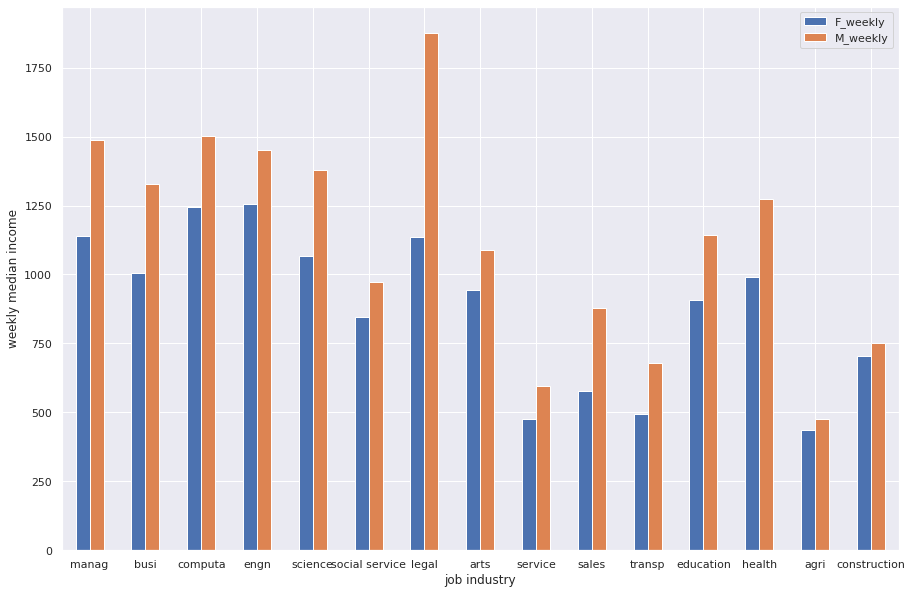

In [28]:
# bar graph for income comparision between differnt major occupations
F_weekly = [1139,1004, 1245, 1257, 1067, 845, 1135, 942, 475, 578, 494, 907, 991, 437, 704]
M_weekly = [1486, 1327, 1503, 1452, 1379, 973, 1877, 1088, 597, 880, 679, 1144, 1272, 477, 751]
index = ['manag', 'busi', 'computa','engn', 'science', 'social service',
          'legal', 'arts', 'service', 'sales', 'transp', 'education', 'health', 
         'agri', 'construction']
df = pd.DataFrame({'F_weekly': F_weekly, 'M_weekly': M_weekly }, index=index)
ax = df.plot.bar(rot=0, figsize = (15,10))
ax.set_xlabel('job industry')
ax.set_ylabel('weekly median income')

This bar graph shows income gap between female and male workers in the major indusries listed in the dateset. We wanted to see a complied visual version of what income gap looks live overall in different kinds of industry. Through this graph we found out that in every major industry there were income gaps and females were always pad less than men. Since we wanted to focus on managerial positions women hold in diffierent industry, we narrowed down to look at the data relating to manegements positions

Text(0, 0.5, 'Manager Job Type')

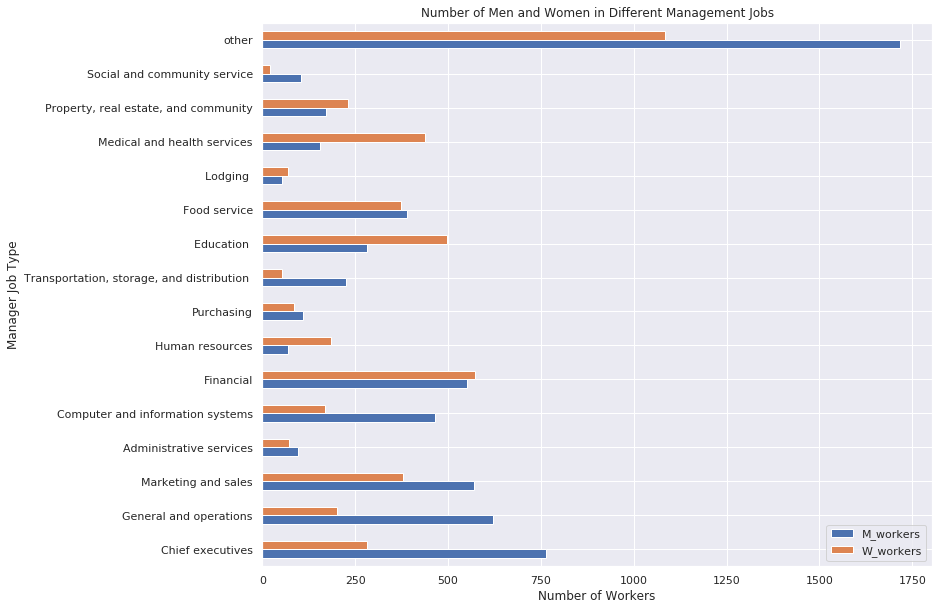

In [29]:
# Bar graph for amount of male and female workers in management jobs
M_workers = [763, 621, 570, 96, 466, 551, 68, 109, 224, 282, 389, 54, 154, 171, 105, 1717]
W_workers = [283, 202, 378, 73, 169, 573, 186, 84, 52, 496, 374, 68, 438, 230, 20, 1085]
index = ['Chief executives', 'General and operations', 'Marketing and sales',
         'Administrative services', 'Computer and information systems', 'Financial', 'Human resources', 'Purchasing',
         'Transportation, storage, and distribution ','Education ','Food service','Lodging ','Medical and health services','Property, real estate, and community','Social and community service','other']
df = pd.DataFrame({'M_workers': M_workers,
                   'W_workers': W_workers}, index=index)
ax = df.plot.barh(rot=0, figsize=(12,10),title = 'Number of Men and Women in Different Management Jobs')
ax.set_xlabel("Number of Workers")
ax.set_ylabel("Manager Job Type")

In this garph, we took the data only of manegement position so that our focus was not too broad. Graphing the data, we found out that in almost every manegement positions, expcept for real estate,health service, lodging, human resources, and finance more male workers held manegerial positions than female workers

Text(0, 0.5, 'manager type')

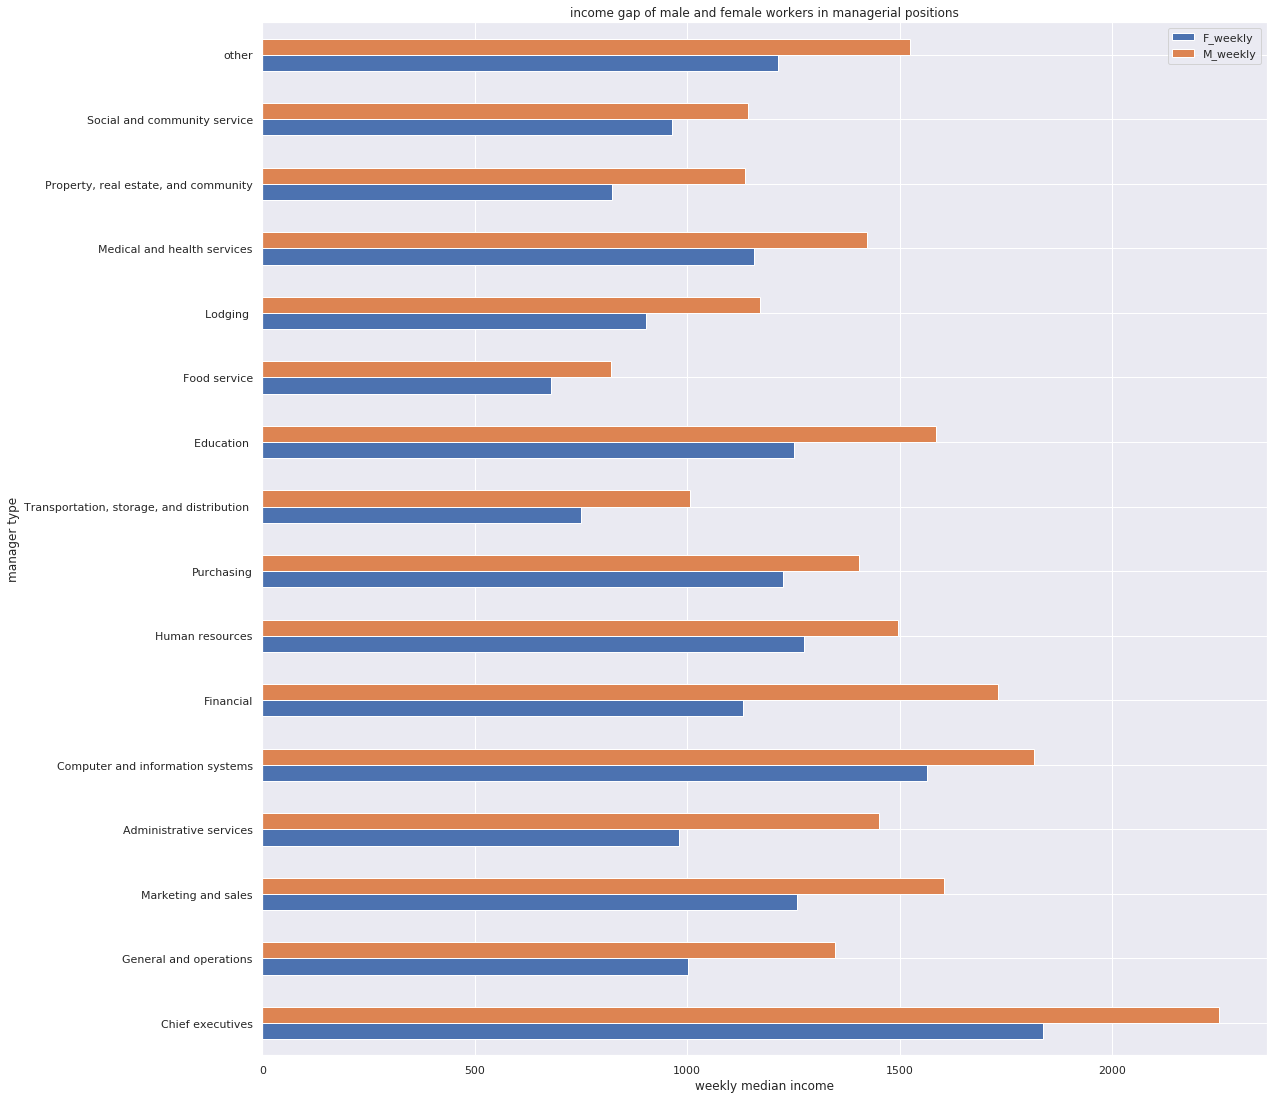

In [24]:
#bar graph of income gap of male and female workers in managerial positions
F_weekly = [1836,1002,1258,981,1563,1130,1274,1226,749,1252,680,902,1156,823,965,1213]
M_weekly = [2251,1347,1603,1451,1817,1732,1495,1404,1006,1585,820,1171,1422,1137,1142,1525]
index = ['Chief executives', 'General and operations', 'Marketing and sales',
         'Administrative services', 'Computer and information systems', 'Financial', 'Human resources', 'Purchasing','Transportation, storage, and distribution ','Education ','Food service','Lodging ',
         'Medical and health services','Property, real estate, and community','Social and community service','other']
df = pd.DataFrame({'F_weekly': F_weekly, 'M_weekly': M_weekly }, index=index)
ax = df.plot.barh(rot=0, title = 'income gap of male and female workers in managerial positions', figsize = (18,19))            
ax.set_xlabel('weekly median income')
ax.set_ylabel('manager type')

Since there were few categories in which there were more women manegers than male manegers, we wanted to know if that would change the income gap between male and femlae. However after we plotted the graph we saw that even though there were more women manegers in some jobs, they still got paid less than male managers. This made us questions why that was the case and so we went into further analysis by looking and analyzing data that showed how women manager positions for past 17 years (2000 to 2017)

Text(0, 0.5, 'Weeky Median Income Gap in Dollars')

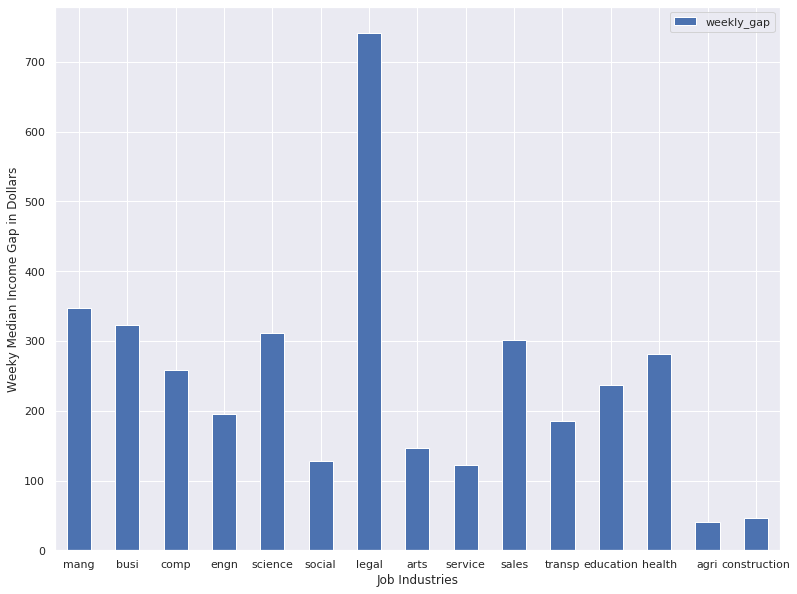

In [31]:
weekly_gap = [347, 323, 258, 195, 312, 128, 742, 146, 122, 302, 185, 237, 281, 40, 47]
index = ['mang', 'busi', 'comp', 'engn', 'science', 'social','legal', 'arts', 
         'service', 'sales', 'transp', 'education', 'health', 
         'agri', 'construction']
df = pd.DataFrame({'weekly_gap':weekly_gap}, index=index)
ax =df.plot.bar(rot=0, figsize = (13,10))
ax.set_xlabel("Job Industries")
ax.set_ylabel("Weeky Median Income Gap in Dollars")

Even though the first graph shows the income gap, it is hard to see the numerical differnece. Thus to make it more clear we made this graph to show the income gap in job industries. 

### Dataset 2

In [4]:
df_mat_lv = pd.read_csv('MaternityLeave.csv')
print("The shape of the data: " + str(df_mat_lv.shape))
df_mat_lv.head()

The shape of the data: (972, 6)


,Name,Industry,Maternity Leave\nPaid (weeks),Maternity Leave\nUnpaid (weeks),Paternity Leave\nPaid (weeks),Paternity Leave\nUnpaid (weeks)
0,ClassPass,Wellness & Fitness,14.0,12.0,4.0,NaN
1,Equinox,Wellness & Fitness,6.0,12.0,NaN,NaN
2,Enterprise Holdings,Transportation: Rental,17.0,17.0,NaN,NaN
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0,NaN,NaN
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0,NaN,NaN


This dataframe contains information about the amount of maternity (and paternity) leave offered by 972 companies



In [5]:
df_mat_lv = df_mat_lv.drop(['Paternity Leave\nPaid (weeks)', 'Paternity Leave\nUnpaid (weeks)'], axis=1)
df_mat_lv.head()

,Name,Industry,Maternity Leave\nPaid (weeks),Maternity Leave\nUnpaid (weeks)
0,ClassPass,Wellness & Fitness,14.0,12.0
1,Equinox,Wellness & Fitness,6.0,12.0
2,Enterprise Holdings,Transportation: Rental,17.0,17.0
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0


In [6]:

df_mat_lv.columns = ["Company Name", "Industry", "Maternity Leave (paid)", "Maternity Leave (unpaid)"]
df_mat_lv.head()

,Company Name,Industry,Maternity Leave (paid),Maternity Leave (unpaid)
0,ClassPass,Wellness & Fitness,14.0,12.0
1,Equinox,Wellness & Fitness,6.0,12.0
2,Enterprise Holdings,Transportation: Rental,17.0,17.0
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0


In [7]:

df_mat_lv["Maternity Leave (unpaid)"] = df_mat_lv["Maternity Leave (unpaid)"].fillna(0.0)
df_mat_lv = df_mat_lv.dropna()
print("the shape of the dataframe is now: " + str(df_mat_lv.shape))

the shape of the dataframe is now: (965, 4)


In [8]:
df_mat_lv['Industry'].unique()


array(['Wellness & Fitness', 'Transportation: Rental', 'Wholesale',
       'Transportation: Rail', 'Transportation: Passenger Air',
       'Transportation: Freight & Logistics',
       'Transportation: Couriers & Delivery', 'Transportation: Bus',
       'Telecommunications', 'Technology: Software',
       'Technology: Security', 'Technology: Research',
       'Technology: Payments', 'Technology: Manufacturing',
       'Technology: Gaming', 'Technology: Financial Services',
       'Technology: Consumer Internet', 'Technology: B2B Tech Services',
       'Sports', 'Services: Waste Management', 'Services: Translation',
       'Services: Other', 'Services: Daycare', 'Services: Cleaning',
       'Retail: Supermarket Company',
       'Retail: Stationary & Office Supplies',
       'Retail: Shoes, Accessories and Apparel', 'Retail: Other',
       'Retail: Online', 'Retail: Jewelery',
       'Retail: General Merchandise',
       'Retail: Furniture & Home Improvement', 'Retail: Electronics',
    

In [9]:

df_industries_sum = pd.read_csv('cpsaat18sum.csv')
df_industries_sum.columns = ["Industry", "Total Unemployed", "Women", "White", "Black or African American", "Asian", "Hispanic or Latino"]

df_industries_sum

,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Total, 16 years and over","157,538",47.0,77.7,12.3,6.5,17.6
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0


In [10]:
df_occ_gender = pd.read_csv('inc_occ_gender.csv')
df_occ_gender.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na


In [11]:
df_occ_gender = df_occ_gender[df_occ_gender.All_weekly != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.M_weekly != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.F_weekly != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.M_workers != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.All_workers != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.F_workers != 'Na']

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
df_occ_gender


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
6,Marketing and sales managers,948,1462,570,1603,378,1258
...,...,...,...,...,...,...,...
521,TRANSPORTATION,6953,646,5998,679,955,494
527,Bus drivers,323,615,184,681,138,572
528,Driver/sales workers and truck drivers,2687,747,2582,751,105,632
550,"Laborers and freight, stock, and material move...",1433,526,1214,547,219,455


In [13]:
x1 = df_occ_gender.loc[df_occ_gender['Occupation'] == "MANAGEMENT"]
x2 = df_occ_gender.loc[df_occ_gender['Occupation'] == "BUSINESS"]
x3 = df_occ_gender.loc[df_occ_gender['Occupation'] == "COMPUTATIONAL"]
x4 = df_occ_gender.loc[df_occ_gender['Occupation'] == "ENGINEERING"]
x5 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SCIENCE"]
x6 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SOCIAL SERVICE"]
x7 = df_occ_gender.loc[df_occ_gender['Occupation'] == "LEGAL"]
x8 = df_occ_gender.loc[df_occ_gender['Occupation'] == "EDUCATION"]
x9 = df_occ_gender.loc[df_occ_gender['Occupation'] == "ARTS"]
x10 = df_occ_gender.loc[df_occ_gender['Occupation'] == "HEALTHCARE PROFESSIONAL"]
x11 = df_occ_gender.loc[df_occ_gender['Occupation'] == "CULLINARY"]
x12 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SERVICE"]
x13 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SALES"]
x14 = df_occ_gender.loc[df_occ_gender['Occupation'] == "OFFICE"]
x15 = df_occ_gender.loc[df_occ_gender['Occupation'] == "AGRICULTIRAL"]
x16 = df_occ_gender.loc[df_occ_gender['Occupation'] == "CONSTRUCTION"]
x17 = df_occ_gender.loc[df_occ_gender['Occupation'] == "MAINTAINANCE"]
x18 = df_occ_gender.loc[df_occ_gender['Occupation'] == "PRODUCTION"]
x19 = df_occ_gender.loc[df_occ_gender['Occupation'] == "TRANSPORTATION"]

job_categories = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19]

df_job_cat = pd.concat(job_categories)
df_job_cat


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
32,BUSINESS,5942,1137,2686,1327,3256,1004
61,COMPUTATIONAL,4009,1428,3036,1503,973,1245
78,ENGINEERING,2656,1424,2272,1452,383,1257
100,SCIENCE,1176,1206,662,1379,514,1067
124,SOCIAL SERVICE,2143,889,776,973,1367,845
133,LEGAL,1346,1391,624,1877,722,1135
139,EDUCATION,6884,956,1849,1144,5034,907
151,ARTS,1643,1001,930,1088,713,942
171,HEALTHCARE PROFESSIONAL,6566,1041,1639,1272,4928,991


In [14]:
def industry_group(industry):
    if 'Technology' in industry:
        out = 'Information'
    elif 'Agriculture' in industry or 'Maritime' in industry:
        out = 'Agriculture, forestry, fishing, and hunting'
    elif 'Information' in industry or 'Telecommunications' in industry:
        out = 'Information'
    elif 'Natural Resources' in industry:
        out = 'Mining, quarrying, and oil and gas extraction'
    elif 'Finance' in industry:
        out = 'Financial activities'
    elif 'Manufacturing' in industry or 'Manufacturers' in industry or 'Textiles' in industry or 'Furniture' in industry:
        out = 'Manufacturing'
    elif 'Aerospace' in industry or 'Packaging' in industry:
        out = 'Manufacturing'
    elif 'Transportation' in industry:
        out = 'Transportation and utilities'
    elif 'Healthcare' in industry or 'Educational' in industry:
        out = 'Education and health services'
    elif 'Pharmaceutical' in industry or 'Pharmacies' in industry:
        out = 'Education and health services'
    elif 'Retail' in industry:
        out = 'Wholesale and retail trade'
    elif 'Wholesale' in industry or 'Cosmetics' in industry or 'Sporting Goods' in industry or "Dealer" in industry:
        out = 'Wholesale and retail trade'
    elif 'Hospitality' in industry or 'Leisure' in industry or 'Fitness' in industry:
        out = 'Leisure and hospitality'
    elif 'Media' in industry or 'Photography' in industry or 'Art' in industry:
        out = 'Leisure and hospitality'
    elif 'Printing' in industry:
        out = "Manufacturing"
    elif 'Publishing' in industry:
        out = 'Leisure and hospitality'
    elif 'Design' in industry or 'Sport' in industry:
        out = 'Leisure and hospitality'
    elif 'Advertising' in industry or 'Consulting' in industry or 'Accounting' in industry or 'Architecture' in industry:
        out = 'Professional and business services'
    elif 'Information Services' in industry or 'Firm' in industry:
        out = 'Professional and business services'
    elif 'Business' in industry or 'Public Relations' in industry or "Conglomerate" in industry:
        out = 'Professional and business services'
    elif 'Insurance' in industry or 'Real Estate' in industry:
        out = 'Financial activities'
    elif 'Government' in industry or 'Defense & Space' in industry:
        out = 'Public administration'
    elif 'Industrial' in industry:
        out = 'Construction'
    elif 'Consumer Packaged' in industry:
        out = 'Manufacturing'
    elif 'Nonprofit' in industry or 'Philanthropy' in industry or 'Services:' in industry:
        out = 'Other services'
    elif 'Automotive' in industry:
        out = 'Manufacturing'
    elif 'Wholesaler' in industry:
        out = 'Wholesale and retail trade'
    else:
        out = industry
    return out

In [15]:

df_mat_lv['Industry Groups'] = df_mat_lv['Industry'].apply(industry_group)
df_mat_lv.head()

,Company Name,Industry,Maternity Leave (paid),Maternity Leave (unpaid),Industry Groups
0,ClassPass,Wellness & Fitness,14.0,12.0,Leisure and hospitality
1,Equinox,Wellness & Fitness,6.0,12.0,Leisure and hospitality
2,Enterprise Holdings,Transportation: Rental,17.0,17.0,Transportation and utilities
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0,Transportation and utilities
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0,Transportation and utilities



Now that the companies have been sorted into a smaller range of industry classifications, it is time to calculate the average number of weeks of paid maternity leave that is provided in these industries

In [17]:
avg_mat_lv_ind = {}
std_ind = {}
range_ind = {}
grps = df_mat_lv.groupby(df_mat_lv['Industry Groups'])
for group in grps:
    ind = group[0]
    grp = group[1]
    std = statistics.stdev(grp['Maternity Leave (paid)'])
    avg = grp['Maternity Leave (paid)'].mean()
    maximum = grp['Maternity Leave (paid)'].max()
    minimum = grp['Maternity Leave (paid)'].min()
    rng = maximum - minimum
    std_ind[ind] = std
    avg_mat_lv_ind[ind] = avg
    range_ind[ind] = rng
    print('Industry: ' + ind + " | Average (paid) Leave: " + str(avg) + ' | Range: ' + str(rng) + ' | Standard Deviation: ' + str(std))

Industry: Agriculture, forestry, fishing, and hunting | Average (paid) Leave: 6.0 | Range: 12.0 | Standard Deviation: 8.48528137423857
Industry: Construction | Average (paid) Leave: 7.12 | Range: 12.0 | Standard Deviation: 3.919183588453085
Industry: Education and health services | Average (paid) Leave: 9.476635514018692 | Range: 52.0 | Standard Deviation: 8.409726841852589
Industry: Financial activities | Average (paid) Leave: 11.93006993006993 | Range: 52.0 | Standard Deviation: 7.465319205509283
Industry: Information | Average (paid) Leave: 11.48062015503876 | Range: 52.0 | Standard Deviation: 7.61063742064629
Industry: Leisure and hospitality | Average (paid) Leave: 8.208955223880597 | Range: 50.0 | Standard Deviation: 6.934296218320881
Industry: Manufacturing | Average (paid) Leave: 9.70625 | Range: 50.0 | Standard Deviation: 7.392989216613401
Industry: Mining, quarrying, and oil and gas extraction | Average (paid) Leave: 10.657142857142857 | Range: 26.0 | Standard Deviation: 6.35

Now this data about the average maternity leave in each industry can be added to the dataset on industry participation



In [18]:
df_industries_sum['Average Paid Maternity Leave']= df_industries_sum['Industry'].map(avg_mat_lv_ind)
df_industries_sum

,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino,Average Paid Maternity Leave
0,"Total, 16 years and over","157,538",47.0,77.7,12.3,6.5,17.6,NaN
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5,6.000000
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1,10.657143
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4,7.120000
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8,9.706250
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1,8.789062
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8,12.218750
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5,11.480620
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9,11.930070
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0,11.250000


In [19]:
total_avg_lv = df_mat_lv['Maternity Leave (paid)'].mean()
total_avg_lv


10.492746113989638

In [20]:
df_industries_sum.at[0, 'Average Paid Maternity Leave'] = total_avg_lv


In [21]:
df_industries_sum


,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino,Average Paid Maternity Leave
0,"Total, 16 years and over","157,538",47.0,77.7,12.3,6.5,17.6,10.492746
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5,6.000000
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1,10.657143
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4,7.120000
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8,9.706250
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1,8.789062
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8,12.218750
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5,11.480620
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9,11.930070
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0,11.250000


In [22]:
df_industry_leave = df_industries_sum.drop(0)
df_industry_leave

,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino,Average Paid Maternity Leave
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5,6.000000
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1,10.657143
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4,7.120000
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8,9.706250
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1,8.789062
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8,12.218750
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5,11.480620
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9,11.930070
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0,11.250000
10,Education and health services,"35,894",74.8,75.3,15.1,6.4,13.5,9.476636


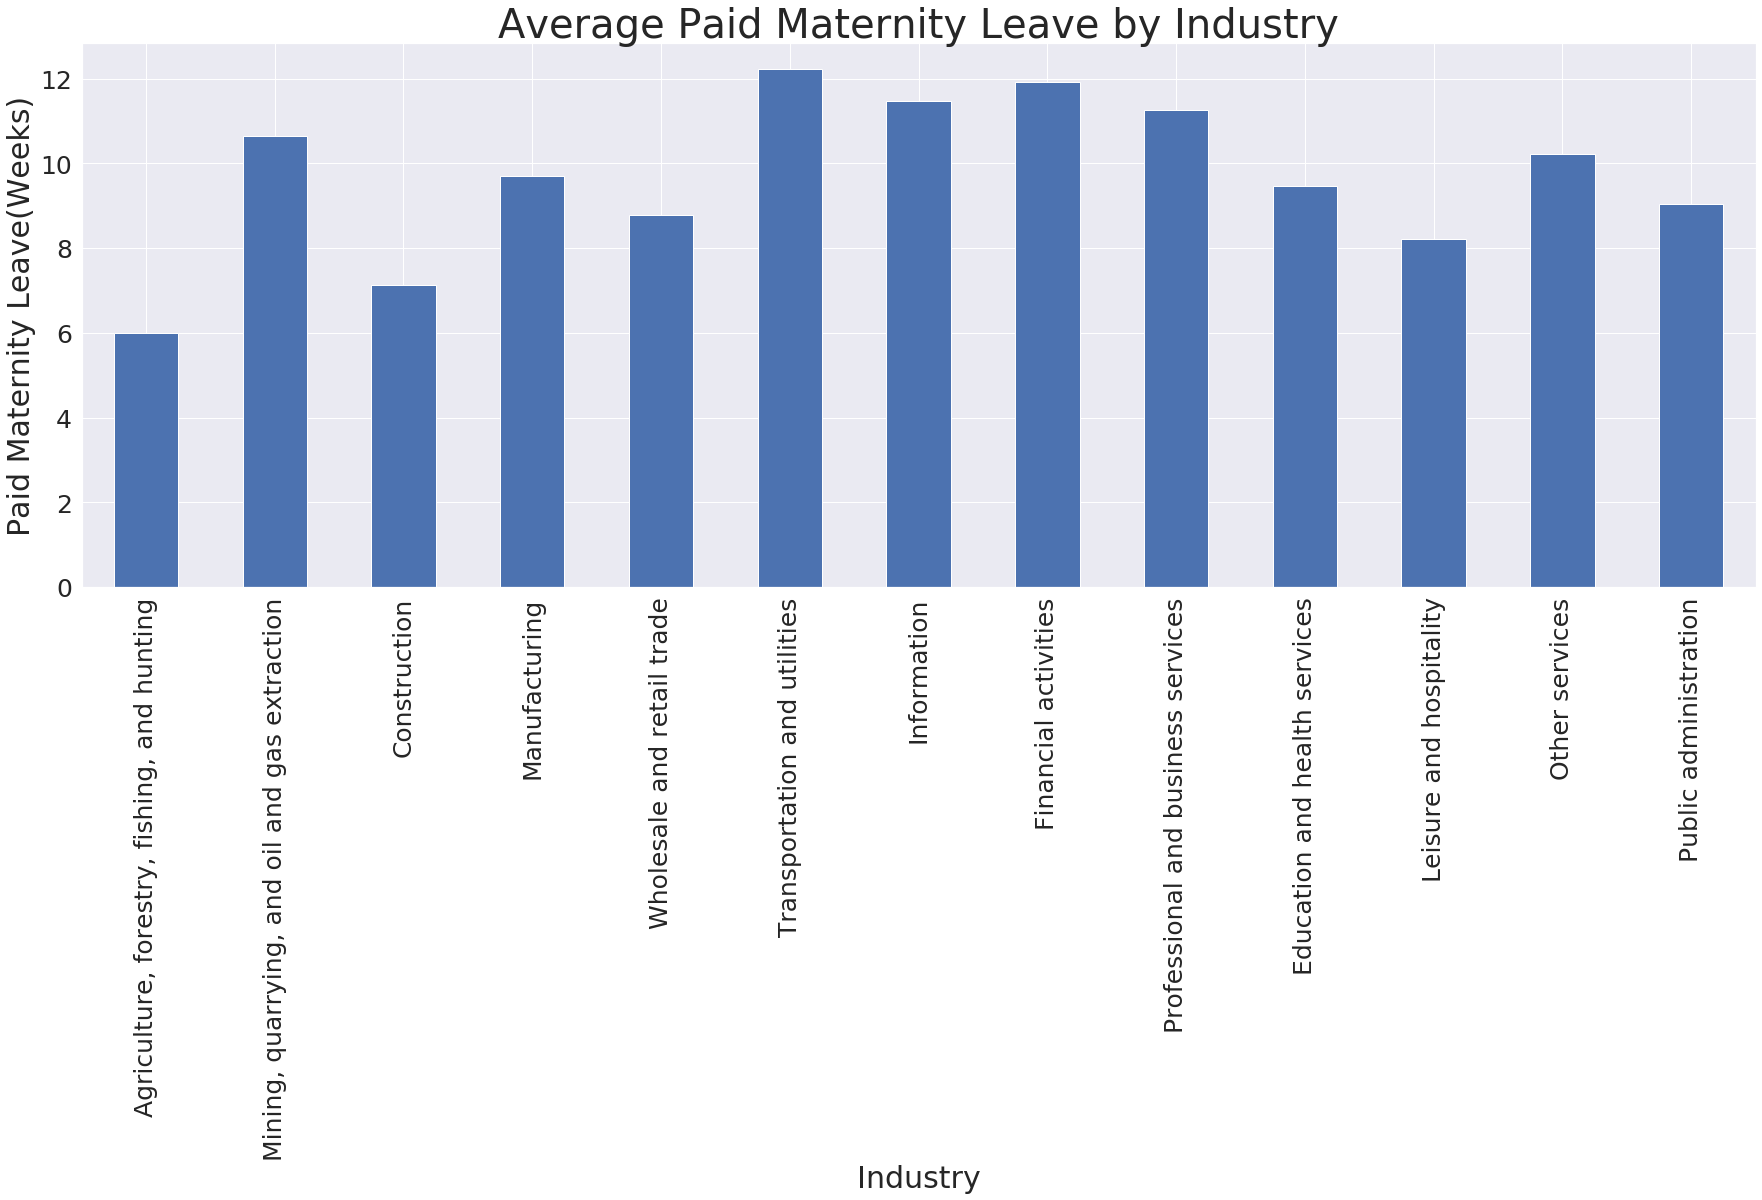

In [23]:
g1 = df_industry_leave.plot.bar('Industry', 'Average Paid Maternity Leave', figsize=(30, 10), legend=False)
g1.set_title("Average Paid Maternity Leave by Industry", fontsize=40)
g1.set_xlabel("Industry", fontsize=30)
g1.set_ylabel("Paid Maternity Leave(Weeks)", fontsize=30)
g1.tick_params(labelsize=25)
f1 = plt.gcf()

The graph shows that the average number of weeks of paid maternity leave in industries like information, Transportation, Fincance, and business services higher than in industries like agriculture and construction.





# Data Analysis

Next we will analyze whether or not the amount of female participation in an industry is related to the average number of weeks of paid maternity leave.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


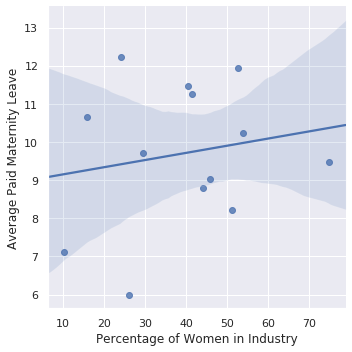

In [24]:
g2 = sns.lmplot(x='Women',y='Average Paid Maternity Leave',data=df_industry_leave,fit_reg=True)
g2 = (g2.set_axis_labels("Percentage of Women in Industry", "Average Paid Maternity Leave"))

Looking at the diagram above, there does not seem to be a significant relationship between the amount of female participation in an industry, and the average number of paid weeks of maternity leave. To be thorough, we will still do a regression.



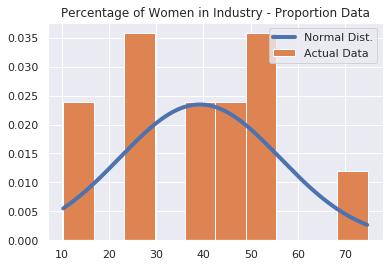

In [28]:
t1 = df_industry_leave["Women"].values

xs = np.arange(t1.min(), t1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(t1), np.std(t1))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(t1, density = True, label = 'Actual Data');
plt.title('Percentage of Women in Industry - Proportion Data')
plt.legend();

In [25]:
x = df_industry_leave["Average Paid Maternity Leave"]
y = df_industry_leave["Women"]
outcome, predictors = patsy.dmatrices('x ~ y', df_industry_leave)
mod_1 = sm.OLS(outcome,predictors)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.3598
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.561
Time:                        23:11:19   Log-Likelihood:                -25.854
No. Observations:                  13   AIC:                             55.71
Df Residuals:                      11   BIC:                             56.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9623      1.341      6.684      0.0

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


Based on this Ordinary Least Squares analysis, we can now analyze a few aspects of this dataset. Firstly the R-squared value is 0.032, meaning that this model only explains about 3.2% of the variance in the average paid maternity leave for women by industry. This is quite a low proportion, which tells us that there is not much of a relationship between the percentage of women in each industry and their average paid maternity leave. 

Also, we can tell from the table that errors are not normally distributed across the data. This is to say that if we were to plot the errors on a graph, they would not take on a normal distribution in the shape of a bell curve. The skew value is -0.2, which is not as close to zero as we would like it to be. Ideally, this value would be somewhat close to zero, which would mean that the residual distribution was normal. 

The Durbin-Watson value tests for homoscedasticity, which means that the error, or noise, is the same across all values of the independent variable. This number is in between 1 and 2, which is the viable interval, but this does not necessarily negate the previous observations and provide proof that there is a linear relationship between these variables. 

Overall, we can conclude that this data is not ideal for modelling because of the lack of a meaningful relationship between the average paid maternity leave and the percentage of women in an industry. 



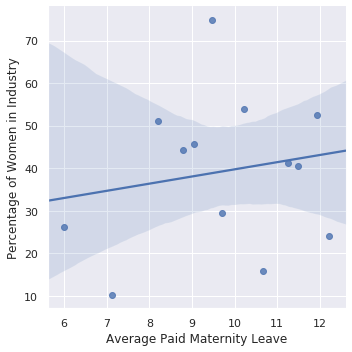

In [29]:
g3 = sns.lmplot(x='Average Paid Maternity Leave',y='Women',data=df_industry_leave,fit_reg=True)
g3 = (g3.set_axis_labels("Average Paid Maternity Leave", "Percentage of Women in Industry"))

In [32]:

x = df_industry_leave["Average Paid Maternity Leave"]
y = df_industry_leave["Women"]
outcome, predictors = patsy.dmatrices('y ~ x', df_industry_leave)
mod_2 = sm.OLS(outcome,predictors)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.3598
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.561
Time:                        23:14:59   Log-Likelihood:                -55.067
No. Observations:                  13   AIC:                             114.1
Df Residuals:                      11   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8969     27.692      0.827      0.4

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))



Our p value is still extremely high, which means that we fail to reject the null hypothesis.

We have answered our first question as to whether or not there is a quantifiable linaer relationship between the percentage of women in an industry and the average number of weeks of paid maternity leave in that industry. Further analysis of this result is given in our conclusion. From here, we would like to examine the technology industry more closely. In our bar graph, it can be shown that the Information industry, which include technology and software companies, the average number of paid weeks of maternity leave provided is higher relative to many of the other industries plotted. We would like to examine the relationship between female labor participation and maternity leave in this industry more closely.

In [33]:

df_gender_manager = pd.read_csv('Reveal_EEO1_for_2016.csv')
df_gender_manager = df_gender_manager[df_gender_manager['race'] != 'Overall_totals']
df_gender_manager = df_gender_manager[df_gender_manager['count'] != 'na']
df_gender_manager = df_gender_manager.astype({"count": int})
df_gender_manager

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4483,Sanmina,2016,White,male,laborers and helpers,2
4484,Sanmina,2016,White,male,Service workers,32
4485,Sanmina,2016,White,male,Totals,1821
4486,Sanmina,2016,White,male,Previous_totals,1854


In [34]:
print(df_mat_lv['Company Name'].unique())

['ClassPass' 'Equinox' 'Enterprise Holdings' 'Hertz Global Holdings, Inc.'
 'Avis Budget Group, Inc.' 'SalonCentric' 'Worldwide Produce'
 'Larson-Juhl' 'Amtrak' 'Union Pacific Railroad' 'United Airlines'
 'Southwest Airlines Co.' 'American Airlines' 'Delta Air Lines, Inc.'
 'HAVI Global Solutions' 'Dematic' 'Schneider National'
 'C.A.R. Transport Inc.' 'FedEx' 'Central Ohio Transit Authority' 'BART'
 'Viasat' 'Asurion' 'Sprint Corporation'
 'Crown Castle International Corporation' 'Qualcomm Incorporated'
 'RingCentral, Inc.' 'AT&T' 'T-Mobile' 'Verizon' 'Comcast' 'Zoom'
 'Spectrum' 'Nokia' 'Bitdefender' 'Rangle.io' 'JHC Systems' 'Zendesk, Inc'
 'Palantir' 'Salesforce' 'PandaDoc' 'Bounce Exchange' 'SAP' 'ServiceNow'
 'VMware' 'Slack Technologies' 'Citrix' 'MicroStrategy' 'Adobe Systems'
 'Ceridian' 'Cornerstone OnDemand, Inc.' 'Informatica' 'Symphony Talent'
 'Addepar' 'Palo Alto Networks' 'Tanium' 'Forcepoint' 'Allegion PLC'
 'Coalfire' 'Alarm.com' 'Raytheon' 'Magic Leap' 'Waters Corpor

In [36]:

data = {'company': [], 'executives_or_managers_count': [], 'maternity_leave_paid': [], 'maternity_leave_unpaid': [], 'total_pop': [], 'e_or_m_ratio':[]}

# The following loops will append a companys total number of female executives/managers as 
# compared to their paid/unpaid maternity leave
for company in df_gender_manager['company'].unique():
    rows = df_gender_manager[df_gender_manager['company'] == company]
    total_pop = rows['count'].sum()
    data['total_pop'].append(total_pop)
    rows = rows[(rows['job_category'] == 'Executives') | (rows['job_category'] == 'Managers')]
    rows = rows[rows['gender'] == 'female']
    rows['count'] = rows['count'].astype(int)
    data['company'].append(company)
    executives_or_managers_count = rows['count'].sum()
    data['executives_or_managers_count'].append(executives_or_managers_count)
    data['maternity_leave_paid'].append(0)
    data['maternity_leave_unpaid'].append(0)
    data['e_or_m_ratio'].append(executives_or_managers_count/total_pop)

for company in df_gender_manager['company'].unique():
    #print(company)
    if company in df_mat_lv['Company Name'].unique():
        index = data['company'].index(company)
        data['maternity_leave_paid'][index] = int(df_mat_lv[df_mat_lv['Company Name']==company]["Maternity Leave (paid)"].values)
        try:
            data['maternity_leave_unpaid'][index] = int(df_mat_lv[df_mat_lv['Company Name']==company]["Maternity Leave (unpaid)"].values)
        except:
            data['maternity_leave_unpaid'][index] = 0

In [37]:
df_num_managers = pd.DataFrame(data)
df_num_managers = df_num_managers.sort_values(by='company', ascending=True)
#df_num_managers.reset_index()
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio
0,23andMe,37,0,0,594,0.062290
1,Adobe,868,0,0,20905,0.041521
2,Airbnb,159,0,0,5235,0.030372
3,Apple,2270,15,10,226878,0.010005
4,Cisco,1342,13,3,111366,0.012050
6,Facebook,638,19,0,30928,0.020629
7,Google,3969,14,7,132191,0.030025
8,HP Inc.,612,9,12,99377,0.006158
9,HPE,1860,0,0,103978,0.017888
10,Intel,1548,0,0,162003,0.009555


In [38]:
df_num_managers = df_num_managers.drop([0,13,23,15,22,16,21,18,19,5])
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio
1,Adobe,868,0,0,20905,0.041521
2,Airbnb,159,0,0,5235,0.030372
3,Apple,2270,15,10,226878,0.010005
4,Cisco,1342,13,3,111366,0.012050
6,Facebook,638,19,0,30928,0.020629
7,Google,3969,14,7,132191,0.030025
8,HP Inc.,612,9,12,99377,0.006158
9,HPE,1860,0,0,103978,0.017888
10,Intel,1548,0,0,162003,0.009555
11,Intuit,420,0,0,18186,0.023095


In [39]:
# manually adding in some of the data from the dataset, by filling in from the original CSV
df_num_managers.at[1,'maternity_leave_paid'] = 17
df_num_managers.at[1,'maternity_leave_unpaid'] = 15
df_num_managers.at[2,'maternity_leave_paid'] = 30
df_num_managers.at[2,'maternity_leave_unpaid'] = 8
df_num_managers.at[9,'maternity_leave_paid'] = 19
df_num_managers.at[9,'maternity_leave_unpaid'] = 29
df_num_managers.at[10,'maternity_leave_paid'] = 8
df_num_managers.at[10,'maternity_leave_unpaid'] = 12
df_num_managers.at[11,'maternity_leave_paid'] = 12
df_num_managers.at[11,'maternity_leave_unpaid'] = 7
df_num_managers.at[12,'maternity_leave_paid'] = 16
df_num_managers.at[12,'maternity_leave_unpaid'] = 4
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio
1,Adobe,868,17,15,20905,0.041521
2,Airbnb,159,30,8,5235,0.030372
3,Apple,2270,15,10,226878,0.010005
4,Cisco,1342,13,3,111366,0.012050
6,Facebook,638,19,0,30928,0.020629
7,Google,3969,14,7,132191,0.030025
8,HP Inc.,612,9,12,99377,0.006158
9,HPE,1860,19,29,103978,0.017888
10,Intel,1548,8,12,162003,0.009555
11,Intuit,420,12,7,18186,0.023095


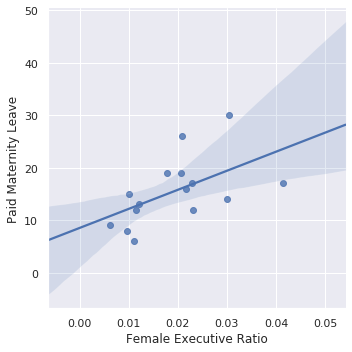

In [40]:
g4 = sns.lmplot(x='e_or_m_ratio',y='maternity_leave_paid',data=df_num_managers,fit_reg=True)
g4 = (g4.set_axis_labels("Female Executive Ratio", "Paid Maternity Leave"))

In [41]:
outcome_4, predictors_4 = patsy.dmatrices('maternity_leave_paid ~ e_or_m_ratio', df_num_managers)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                             OLS Regression Results                             
Dep. Variable:     maternity_leave_paid   R-squared:                       0.301
Model:                              OLS   Adj. R-squared:                  0.247
Method:                   Least Squares   F-statistic:                     5.585
Date:                  Fri, 12 Jun 2020   Prob (F-statistic):             0.0344
Time:                          23:17:54   Log-Likelihood:                -45.908
No. Observations:                    15   AIC:                             95.82
Df Residuals:                        13   BIC:                             97.23
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.5323     

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


Based on this Ordinary Least Squares analysis, we can now analyze similar aspects of this dataset as compared to the ones above. Firstly the R-squared value is 0.301, meaning that this model explains about 30.1% of the variance in the average paid maternity leave. Although this proportion is still fairly low, this regression analysis has a higher R-squared than above. This tells us that there is somewhat of a linear relationship between the female executive ratio and the amount of paid maternity leave.

The skew value is 0.6, which is again not as close to zero as we would like it to be. Ideally, this value would be somewhat close to zero, which would mean that the residual distribution was normal. 

The Durbin-Watson value tests for homoscedasticity, which means that the error, or noise, is the same across all values of the independent variable. This number is not between 1 and 2, which is the viable interval, and we can also tell from the graph that the noise is fairly dispersed throughout the values of the independent variable. This does not necessarily negate the previous observations that are more in favor of there being a linear relationship between these variables. 

Since the p-value is less than 0.5, we can reject the null hypothesis and say that the female executive ratio does have a significant effect on paid maternity leave. 




In order to expolore this dataset further, we will do a similar regression measuring the total amount of maternity leave, paid and unpaid against the ratio of female executives.

In [42]:
df_num_managers['total_leave'] = df_num_managers['maternity_leave_paid'] + df_num_managers['maternity_leave_unpaid']
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio,total_leave
1,Adobe,868,17,15,20905,0.041521,32
2,Airbnb,159,30,8,5235,0.030372,38
3,Apple,2270,15,10,226878,0.010005,25
4,Cisco,1342,13,3,111366,0.012050,16
6,Facebook,638,19,0,30928,0.020629,19
7,Google,3969,14,7,132191,0.030025,21
8,HP Inc.,612,9,12,99377,0.006158,21
9,HPE,1860,19,29,103978,0.017888,48
10,Intel,1548,8,12,162003,0.009555,20
11,Intuit,420,12,7,18186,0.023095,19


In [43]:
r_total = df_num_managers['total_leave'].max() - df_num_managers['total_leave'].min()
print("The range for the total weeks of leave provided is: " + str(r_total) + " weeks.")
r_paid = df_num_managers['maternity_leave_paid'].max() - df_num_managers['maternity_leave_paid'].min()
print("The range for the number of paid weeks of leave provided is: " + str(r_paid) + " weeks.")

The range for the total weeks of leave provided is: 36 weeks.
The range for the number of paid weeks of leave provided is: 24 weeks.


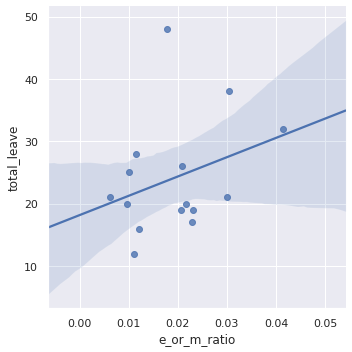

In [44]:
g5 = sns.lmplot(x='e_or_m_ratio',y='total_leave',data=df_num_managers,fit_reg=True)
g4 = (g4.set_axis_labels("Female Executive Ratio", "Total Leave provided (paid and unpaid)"))

In [45]:
outcome_5, predictors_5 = patsy.dmatrices('total_leave ~ e_or_m_ratio', df_num_managers)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_leave   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.490
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.244
Time:                        23:19:17   Log-Likelihood:                -53.421
No. Observations:                  15   AIC:                             110.8
Df Residuals:                      13   BIC:                             112.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.1669      5.430      3.346   

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


Since the p-value is less than 0.5, we can reject the null hypothesis and say that the female executive ratio does have a significant effect on paid maternity leave.

### Dataset 3 and 4

In order to clean these datasets, I had to take out all the unneeded columns that contained information that I didn't need to use. Since these datasets are sourced from the United Nations, I had to choose only the data from the United States, since this was the part of the data that we were interested in. I also took out all the null values and empty columns that did not add valuable information to my analysis. 

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [51]:
df_management = pd.read_csv("managerialpostions.csv")
df_management.head()
df_management_us = df_management[df_management.Country == "United States of America"]

In [52]:
df_senior = pd.read_csv("senior_management_positions.csv")
df_senior_us = df_senior[df_senior.Country == "United States of America"]

In [53]:
df_management_us = df_management_us.drop(columns =["Age", "Location", "Occupation", "LowerBound", "UpperBound", "OriginData", "Footnote1", "Footnote2"]) 
df_management_us.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
792,Proportion of women in managerial positions,Developed regions,840,United States of America,2003,Female,37.5,Percentage,Country data
793,Proportion of women in managerial positions,Developed regions,840,United States of America,2008,Female,38.3,Percentage,Country data
794,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,36.0,Percentage,Country data
795,Proportion of women in managerial positions,Developed regions,840,United States of America,2005,Female,37.8,Percentage,Country data
796,Proportion of women in managerial positions,Developed regions,840,United States of America,2007,Female,38.4,Percentage,Country data


In [54]:
df_senior_us = df_senior_us.drop(columns = ["Age", "Location", "Occupation", "LowerBound", "UpperBound", "OriginData", "Footnote1", "Footnote2", "Footnote3", "Footnote4", "Footnote5", "Footnote6", "Coverage"]) 
df_senior_us.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
588,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2003,Female,37.3,Percentage,Country data
589,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2008,Female,37.9,Percentage,Country data
590,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2000,Female,35.5,Percentage,Country data
591,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2005,Female,37.5,Percentage,Country data
592,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2007,Female,38.1,Percentage,Country data


In [55]:
df_manage = pd.concat([df_management_us, df_senior_us], ignore_index=True)
df_manage = df_manage.replace({'Indicator Name': "Proportion of women in senior and middle management positions"}, "Proportion of women in managerial positions")
df_manage = df_manage.sort_values('Year')
df_manage = df_manage.reset_index(drop=True)
df_manage.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
0,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,36.0,Percentage,Country data
1,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,35.5,Percentage,Country data
2,Proportion of women in managerial positions,Developed regions,840,United States of America,2001,Female,35.9,Percentage,Country data
3,Proportion of women in managerial positions,Developed regions,840,United States of America,2001,Female,36.4,Percentage,Country data
4,Proportion of women in managerial positions,Developed regions,840,United States of America,2002,Female,36.4,Percentage,Country data


### Data Analysis & Results

### Datasets 3 and 4

In [56]:
df_manage.describe()

,Country Code,Year,Value
count,36.0,36.000000,36.000000
mean,840.0,2008.500000,38.147222
std,0.0,5.261722,1.262534
min,840.0,2000.000000,35.500000
25%,840.0,2004.000000,37.300000
50%,840.0,2008.500000,38.300000
75%,840.0,2013.000000,39.025000
max,840.0,2017.000000,40.500000


This chart shows the basic description of the proportion of women in management positions over the course of 17 years. We can ignore the "Country Code" and "Year" column, as those are not the variables that we want to describe. When we look at the statistical description of the column "Value", we can see that the smallest proportion of women was 35.5% in the year 2000, and that this percentage has increased to 40.5% in the year 2017. 

Text(0.5, 1.0, 'Proportion of Women in Management Positions from 2000 to 2017')

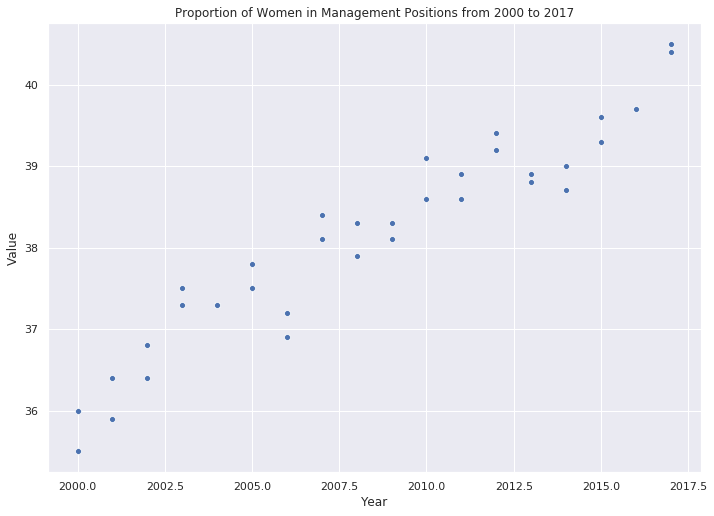

In [57]:
ax = sns.scatterplot(x="Year", y="Value", data=df_manage)
ax.set_title("Proportion of Women in Management Positions from 2000 to 2017")

From this inital scatterplot created by plotting the proportion of women in management positions versus the year of the observation, we can already tell that there is a strong positive relationship between these two variables. 

However, to be sure of this, we can go on to perform a linear regression analysis to find out the strength of this relationship.

The type of linear regression that we will be performing is an Ordinary Least Squares analysis, which means that we are fitting a regression line that would minimize the square of distance from the regression line.

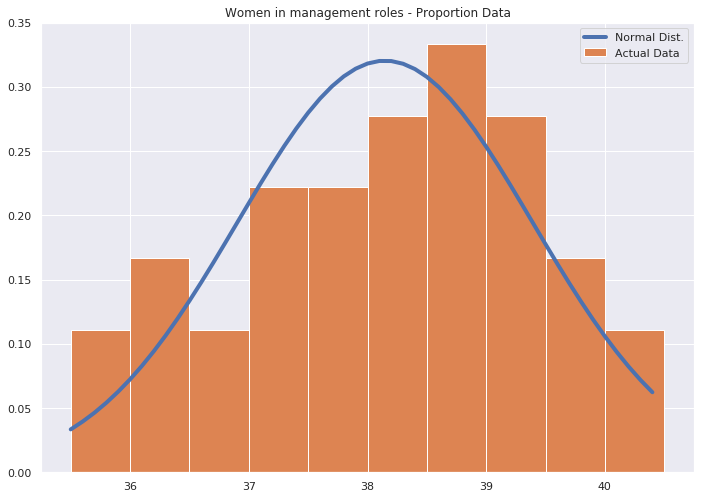

In [58]:
h_co = df_manage['Value'].values

xs = np.arange(h_co.min(), h_co.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_co), np.std(h_co))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_co, density = True, label = 'Actual Data');
plt.title('Women in management roles - Proportion Data')
plt.legend();

This graph shows that the data we are about to analyze are normally distributed. This means that we are able to run a linear regression analysis on this data.

In [59]:
# X, or the year, is the independent variable, and Y, or the value/proportion of women, is the dependent value.
x = df_manage["Year"]
y = df_manage["Value"]


outcome, predictors = patsy.dmatrices('y ~ x', df_manage)

# this carries out the Ordinary Least Squares analysis
mod_1 = sm.OLS(outcome,predictors)
res_1 = mod_1.fit()

# Print out the statistics
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     352.6
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.60e-19
Time:                        23:27:32   Log-Likelihood:                -15.207
No. Observations:                  36   AIC:                             34.41
Df Residuals:                      34   BIC:                             37.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -422.1081     24.510    -17.222      0.0

This table shows the coefficient of this regression to be 0.2292. This means that as the Year variable increases by 1, there will be a 0.2292 increase in the proportion of women in management positions. We can interpret this to mean that the proportion of women in management positions increases by around 2.3% each year. This trend has held steady from the year 2000.

Based on this output, we can see that the R-squared value is 0.912, meaning that this model explains 91.2% of the variance in the proportion of women in management positions.



#### Visualizing Linear Regression

In [60]:
df = pd.DataFrame(df_manage, columns=['Year', 'Value'])

#Check correlation between Year and Value
df.corr()


,Year,Value
Year,1.000000,0.955019
Value,0.955019,1.000000


Text(0.5, 0.98, 'Proportion of Women in Management Positions Over Time')

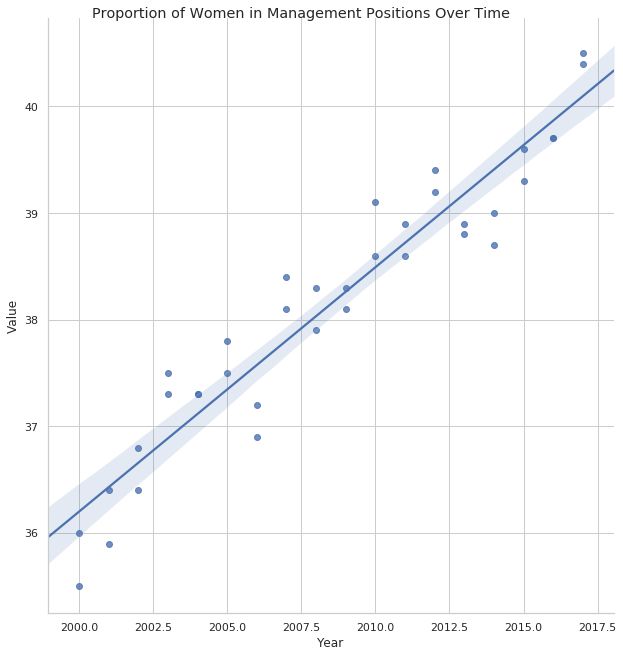

In [61]:
sns.set_style('whitegrid') 
g = sns.lmplot(x='Year', y='Value', data=df_manage)
g.fig.set_size_inches(10,10)
g.fig.suptitle("Proportion of Women in Management Positions Over Time")

In [62]:
predictions = res_1.predict(predictors)

In [63]:
#shows the predictions made based off of this model
print(predictions)

[36.1994152  36.1994152  36.42856897 36.42856897 36.65772274 36.65772274
 36.8868765  36.8868765  37.11603027 37.11603027 37.34518404 37.34518404
 37.57433781 37.57433781 37.80349157 37.80349157 38.03264534 38.03264534
 38.26179911 38.26179911 38.49095287 38.49095287 38.72010664 38.72010664
 38.94926041 38.94926041 39.17841417 39.17841417 39.40756794 39.40756794
 39.63672171 39.63672171 39.86587547 39.86587547 40.09502924 40.09502924]


This list of predictions shows the predicted proportion of women in management in the coming years. This is based on the model that we fitted using the Ordinary Least Squares analysis.

For example, one way to interpret these results would be to say that in 5 years from 2017, or in 2022, the predicted percentage increase in women in senior and middle management positions would be around: 5 * (0.2292) = 1.146%. Therefore in 2022, the predicted proportion of women in management positions would be close to 41.646. This shows the gradual increase in the proportion of women with the passing of time.

However, there are some confounding factors that might have contributed to a skewed analaysis of these two variables. This could have been bias in the women that were observed, they might have all been chosen from the same industry, which could have been one that had a higher or lower than average proportion of women in management. Also, the definition of "management positions" could have too specific to generalize over an entire workforce of women, or maybe too general.

With these preliminary results, I conclude that there has been a steady increase in the proportion of women in the workforce over the last 20 or so years, but there is still a long way to go before women make up 50% of people in management positions.

## Ethics and Privacy

The data that we used was either public and/or licensed, so we had the right to access it. This data came from Kaggle, the United Nations Gender Statistics Database, the US Bureau of Labor and Statistics, FairyGodBoss, and the Census, which are all publicly licensed databases. Also, the identity of the participants was not disclosed. If this was an issue in our data, it would have violated the basic confidentiality of the participants, and also violated the basic rules of ethics in data science. We did this using the Safe Harbour Method, which requires that specific identifiers such as telephone numbers, vehicle identifiers, and email addresses are removed from the data. This was somewhat simple to do, since the websites we got our data from were already available for public use. 


We do acknowledge that there might have been some bias in the maternity leave data from FairyGodBoss,  since it is crowdsourced data and may be inaccurate. There may have also been racial bias within the data that we were not able to detect due to the identities being unknown. For example, The Bureau of Labor Statistics does acknowledge that anybody who identified as Latino in the census, regardless of their race, was recorded as Latino in this dataset, which may account for inaccuracies. Data is not shown for all races either, indicating a bias towards races with more prominent populations in the US. However, since we framed our question in terms of gender and not race, we believe the data we are using is reliable for our purposes. Since adding race as a factor might somewhat skew the dataset or show evidence of a confounding variable, we chose to forego this as a variable in our analysis. However, we do acknowledge that the datasets we are using refer to gender as a binary. We also acknowledge that the issues surrounding our topic are complex. As a result, we did our best to address confounding variables. Finally, we acknowledge these biases and keep them in mind before concluding generalizations. 

## Conclusion and Discussion

In our first analysis, we found that the relationship between female participation in various industries did not have a significant relationship with the average number of weeks of maternity leave offered in that industry. This could be due to a number of biases and confounding factors. 

Since there were many potential confounding variables, we decided to focus on one potential confounding variable and examine further. The variable we chose to examine was the proportion of women in managerial positions. Our initial data visualizations showed that in all job industry categories defined by the bureau of labor statistics, there were income gaps in all occupations and women were paid less than men.  We then did the data visualization of women and men in managerial positions and it showed that  there was a clear disparity between the number of males and females in executive and managerial positions. Even though there were some manager positions in which there were more women managers, they were still paid less than their male counterparts.

Since available datasets were limited, we focused our search on the technology industry. This was primarily for two reasons: (1) There was more data available about maternity leave and companies in the technology industry and (2) In our first exploratory data analysis we found that the average number of weeks of maternity leave provided by companies in that industry were higher than others in the dataset. As a result, we felt it was the logical next step in our analysis. 

To further analyze the data, we look specifically at the technology industry and its correlation with maternity leave. Our analysis of 11 Silicon Valley companies showed that there was a significant correlation between the ratio of women in managerial positions and the amount of paid as well total (paid + unpaid) leave provided by those companies. This potentially shows that more women in leadership positions can lead to more maternity leave offered by companies and allow women more room to grow both families and careers. 
Our last analysis explored the change in the number of women in management positions in the United States over 18 years, from 2000-2017. The results proved a string upward trend in women occupying managerial positions in the labor force, and our linear regression test showed that these results were likely not due to chance. 

Given that this analysis was on a small dataset, we cannot generalize our results to broadly. More research has to be done in other industries. Furthermore, there are other confounding variables to examine, like the proportion of racial minorities participating in these industries. We accept that the limitations of our datasets cannot allow for generalizations, but still believe that our results demonstrate the importance of further study into the relationship between maternity leave and female participation in the workforce. 


## Team Contributions

All members of the group participated equally.
